In [7]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import frame_tools as ft

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
START_DATE = "2018-01-01"
# END_DATE = "2018-05-15"
NUMBER_OF_DAYS_TO_PREDICT = 10

In [9]:
df = pd.read_csv('bit_coin_prices_trade.csv')
just_dates_and_prices_df = df[['snapped_at', 'price']]
just_dates_and_prices_df['snapped_at'] = pd.DatetimeIndex(just_dates_and_prices_df['snapped_at'])

/home/ak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


snapped_at    datetime64[ns]
price                float64
dtype: object

In [14]:
training_data = just_dates_and_prices_df.rename(columns={'snapped_at': 'ds', 'price': 'y'})
training_data = ft.slice_above(training_data, 'ds', limit=START_DATE, including_limit=True)

In [15]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

# the learning
my_model.fit(training_data)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ak/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [16]:
future_dates = my_model.make_future_dataframe(periods=NUMBER_OF_DAYS_TO_PREDICT)
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
141,2018-05-22,8949.189537,6707.202256,11109.475026
142,2018-05-23,9026.705391,6955.568522,11100.926495
143,2018-05-24,8857.030641,6523.184392,11012.718929
144,2018-05-25,9210.581240,7098.191426,11199.487787
145,2018-05-26,9374.495296,7164.826027,11476.052429


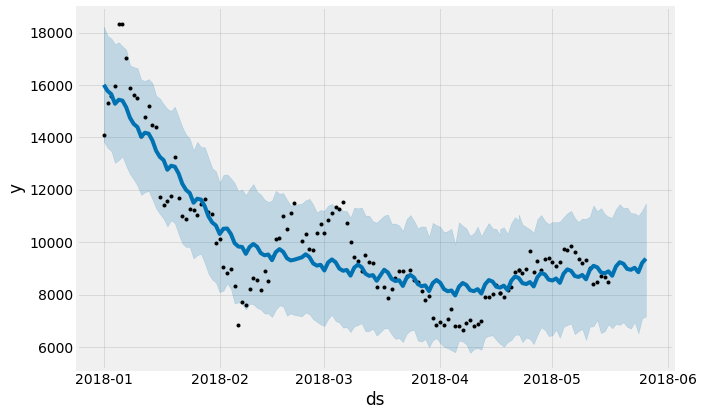

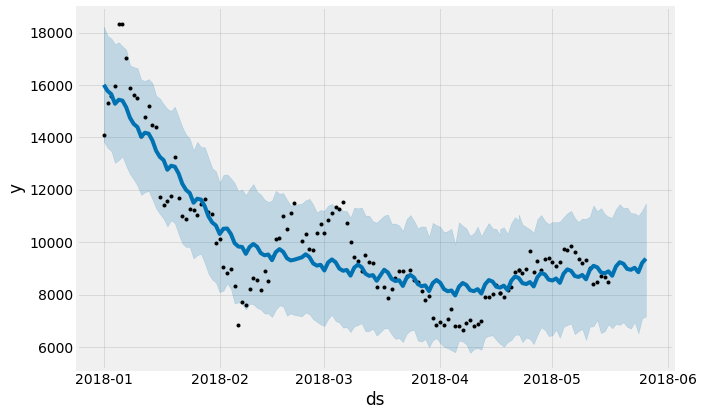

In [17]:
my_model.plot(forecast, uncertainty=True)

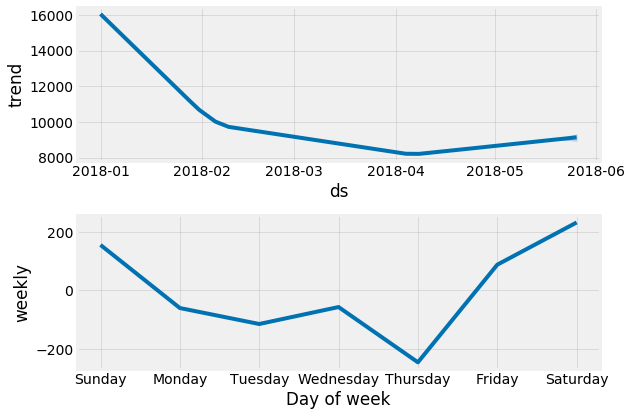

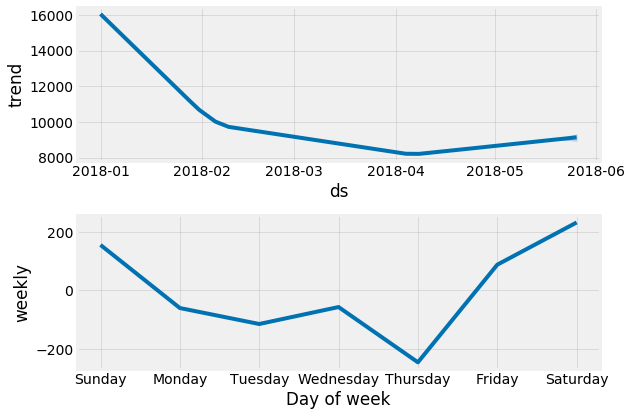

In [19]:
my_model.plot_components(forecast)